# U1L3- Drill: Present the same data multiple ways

# Choose one variable and plot that variable four different ways.

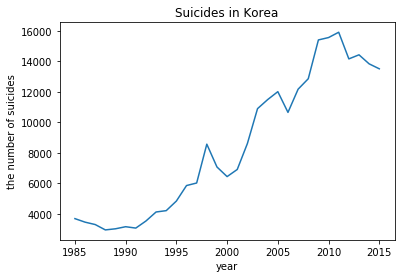

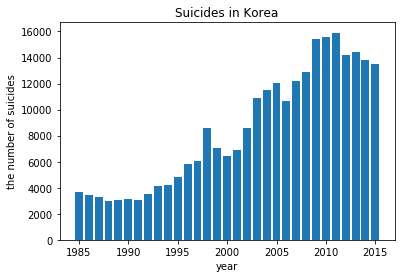

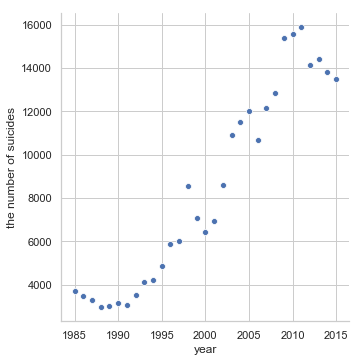

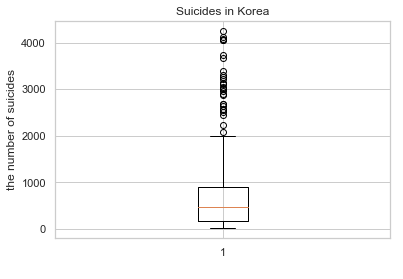

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('who_suicide_statistics.csv')

df['suicides_pct']=df['suicides_no']/df['population']*100


plt.plot(df.loc[df['country']=='Republic of Korea','suicides_no'].groupby(df['year']).sum())
plt.xlabel('year')
plt.ylabel('the number of suicides')
plt.title('Suicides in Korea')
plt.show()

plt.bar(df.loc[df['country']=='Republic of Korea','suicides_no'].groupby(df['year']).sum().index,df.loc[df['country']=='Republic of Korea','suicides_no'].groupby(df['year']).sum())
plt.xlabel('year')
plt.ylabel('the number of suicides')
plt.title('Suicides in Korea')
plt.show()

data=df.loc[df['country']=='Republic of Korea','suicides_no'].groupby(df['year']).sum()
sns.set(style='whitegrid')
g=sns.relplot(data=data)
g.set_ylabels('the number of suicides')
g.set_xlabels('year')
plt.show()

plt.boxplot(df.loc[(df['country']=='Republic of Korea'),'suicides_no'])
plt.xlabel(' ')
plt.ylabel('the number of suicides')
plt.title('Suicides in Korea')
plt.show()

# Choose two continuous variables, and plot them three different ways.

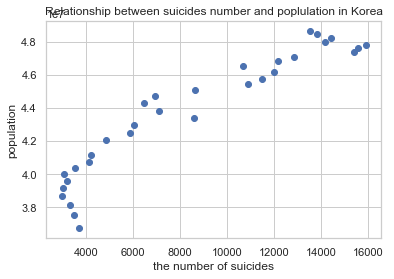

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


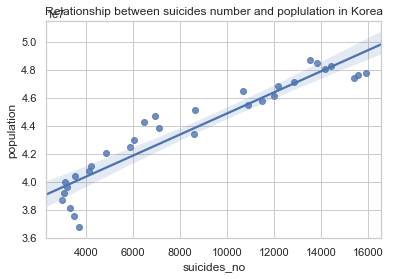

In [62]:
import seaborn as sns

x=df.loc[df['country']=='Republic of Korea','suicides_no'].groupby(df['year']).sum()
y=df.loc[df['country']=='Republic of Korea','population'].groupby(df['year']).sum()
# sns.set(style='whitegrid')
# g=sns.relplot(x=x,y=y)
plt.scatter(x,y)
plt.ylabel('population')
plt.xlabel('the number of suicides')
plt.title('Relationship between suicides number and poplulation in Korea')
plt.show()

data=df.loc[df['country']=='Republic of Korea','suicides_no':'population'].groupby(df['year']).sum()
g=sns.regplot(x='suicides_no',y='population',data=data,fit_reg=True)
plt.title('Relationship between suicides number and poplulation in Korea')
plt.show()



# Choose one continuous variable and one categorical variable, and plot them six different ways.

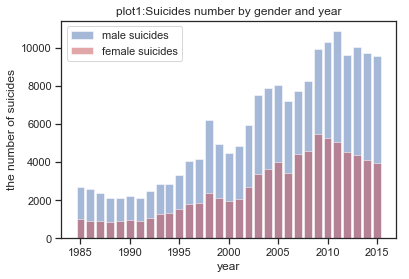

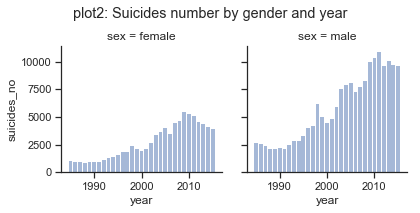

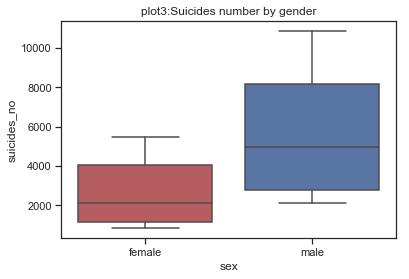

In [110]:
sns.set_style('ticks')
female_sui=df.loc[(df['country']=='Republic of Korea') & (df['sex']=='female'),'suicides_no'].groupby(df['year']).sum()
male_sui=df.loc[(df['country']=='Republic of Korea') & (df['sex']=='male'),'suicides_no'].groupby(df['year']).sum()

female=pd.DataFrame({'suicides_no':female_sui, 'sex':'female'})
male=pd.DataFrame({'suicides_no':male_sui, 'sex':'male'})
data=pd.concat([female,male])
data['year']=data.index
data=data.reset_index(drop=True)

plt.bar(male_sui.index,male_sui, color='b', alpha=.5, label='male suicides')
plt.bar(female_sui.index,female_sui, color='r', alpha=.5, label='female suicides')
plt.xlabel('year')
plt.ylabel('the number of suicides')
plt.legend(loc='upper left')
plt.title('plot1:Suicides number by gender and year')
plt.show()

g = sns.FacetGrid(data, col="sex")
g.map(plt.bar, 'year','suicides_no', color='b', alpha=.5, lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.8)
plt.suptitle('plot2: Suicides number by gender and year')
plt.show()

#boxplots
ax=sns.boxplot(x='sex',y='suicides_no',data=data,palette=sns.color_palette(['r', 'b']))
plt.title('plot3:Suicides number by gender')
plt.show()


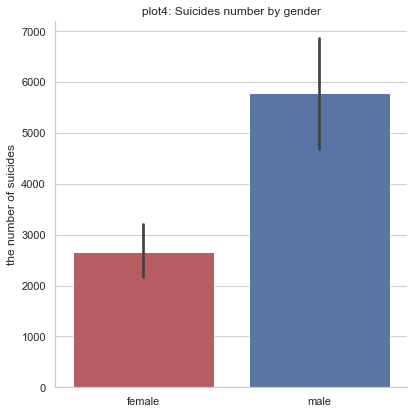

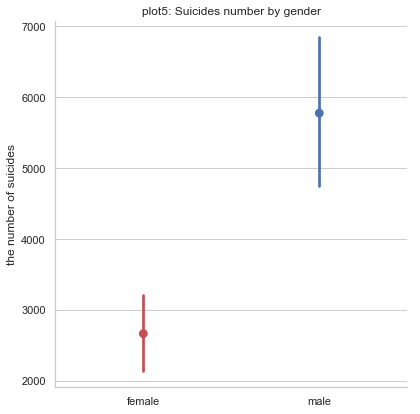

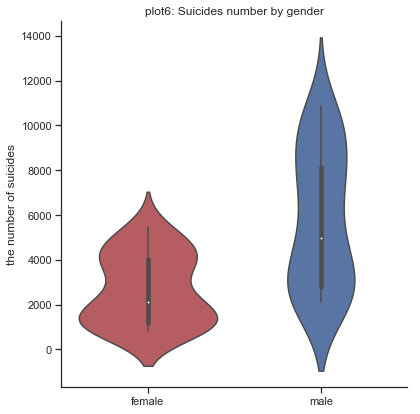

In [111]:
#barplots

sns.set_style('whitegrid')
g=sns.catplot(x='sex',y='suicides_no',data=data,height=6,kind='bar',palette=sns.color_palette(['r', 'b']),ci=95)
g.set_ylabels('the number of suicides')
g.set_xlabels('')
plt.title('plot4: Suicides number by gender')
plt.show()

#pointplots

g=sns.catplot(x='sex',y='suicides_no',data=data,height=6,kind='point',palette=sns.color_palette(['r', 'b']),ci=95)
g.set_ylabels('the number of suicides')
g.set_xlabels('')
plt.title('plot5: Suicides number by gender')
plt.show()

#violinplots
sns.set_style('ticks')
g=sns.catplot(x='sex',y='suicides_no',data=data,height=6,kind='violin',palette=sns.color_palette(['r', 'b']),ci=95)
g.set_ylabels('the number of suicides')
g.set_xlabels('')
plt.title('plot6: Suicides number by gender')
plt.show()